Objective:
Analyze Netflix's TV shows and movies dataset to explore content trends, popular genres, top countries, and directors using Python, Pandas, and Matplotlib.

Key Insights:

📺 Majority of Netflix content is Movies over TV Shows

🌍 United States, India, and UK are the top contributors

📈 Number of titles has significantly increased post-2017

🎬 Drama and International genres dominate the platform

🎥 Top directors include prolific creators like Rajiv Chilaka

Tools Used:

Python

Pandas

Matplotlib

Seaborn

Google Colab

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
# Load the CSV file
df = pd.read_csv('/content/netflix_titles.csv')

# Display the first 5 rows
df.head()


NameError: name 'pd' is not defined

In [2]:
# Load the CSV file
df = pd.read_csv('/content/netflix_titles.csv')

# Display the first 5 rows
df.head()


NameError: name 'pd' is not defined

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the CSV
df = pd.read_csv('/content/netflix_titles.csv')

# Show first 5 rows
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Drop rows with missing 'director'
df_clean = df.dropna(subset=['director'])

# Fill missing values in 'country' and 'rating'
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean['rating'] = df_clean['rating'].fillna('Not Rated')

# Convert 'date_added' to datetime format
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'])

# Confirm cleaning is done
df_clean.info()


<ipython-input-5-81eb02bc93cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country'] = df_clean['country'].fillna('Unknown')
<ipython-input-5-81eb02bc93cf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rating'] = df_clean['rating'].fillna('Not Rated')


ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1248. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [6]:
# Drop rows with missing 'director'
df_clean = df.dropna(subset=['director']).copy()

# Fill missing values using .loc to avoid warning
df_clean.loc[:, 'country'] = df_clean['country'].fillna('Unknown')
df_clean.loc[:, 'rating'] = df_clean['rating'].fillna('Not Rated')

# Convert 'date_added' to datetime safely
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')

# Check final info
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6173 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6173 non-null   object        
 1   type          6173 non-null   object        
 2   title         6173 non-null   object        
 3   director      6173 non-null   object        
 4   cast          5700 non-null   object        
 5   country       6173 non-null   object        
 6   date_added    6168 non-null   datetime64[ns]
 7   release_year  6173 non-null   int64         
 8   rating        6173 non-null   object        
 9   duration      6170 non-null   object        
 10  listed_in     6173 non-null   object        
 11  description   6173 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 626.9+ KB


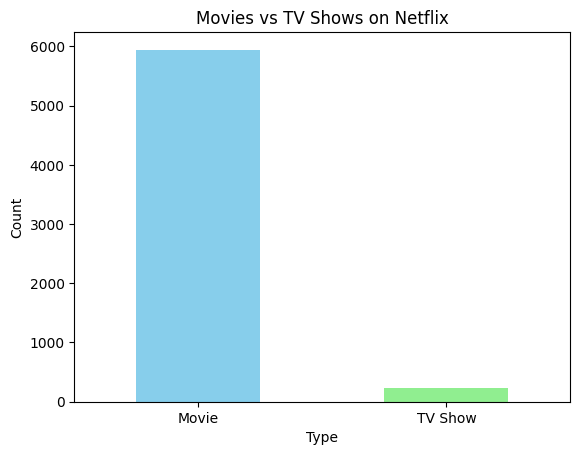

In [7]:
df_clean['type'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


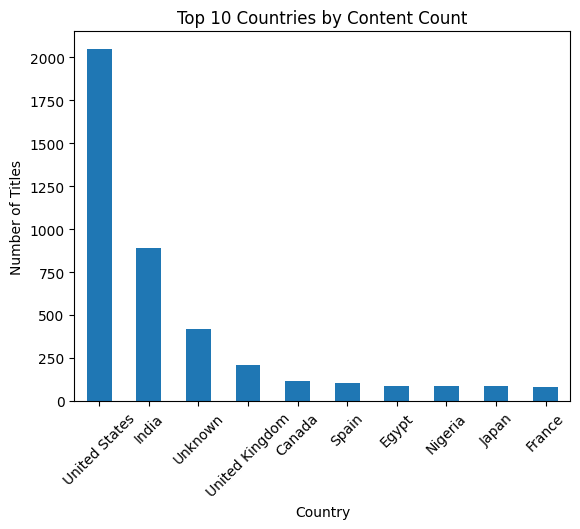

In [8]:
df_clean['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


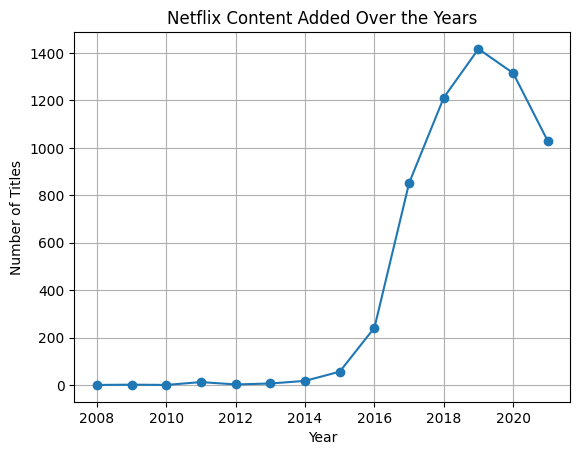

In [9]:
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


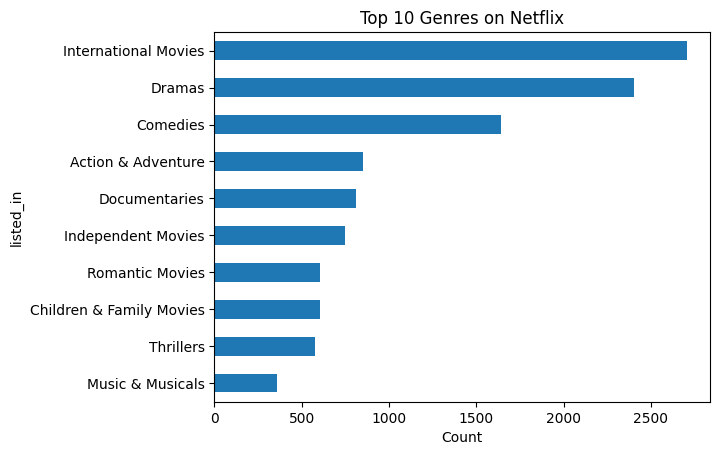

In [10]:
from collections import Counter

genre_series = df_clean['listed_in'].str.split(', ').explode()
top_genres = genre_series.value_counts().head(10)

top_genres.plot(kind='barh')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()


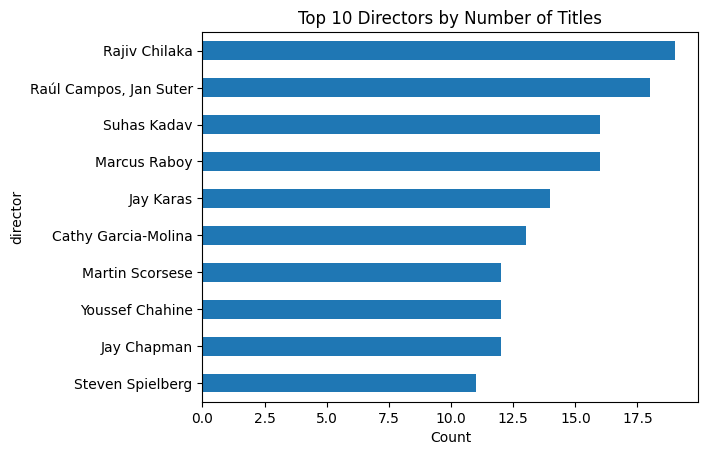

In [11]:
df_clean['director'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()
